In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
qc = QuantumCircuit(3)
for qubit in range(3):
    qc.h(qubit)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [5]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc, backend).result().get_statevector()
print(final_state)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


## Single Qubit Gates on Multi-Qubit Statevectors

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [9]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc, backend).result().get_unitary()

In [10]:
print(unitary)

[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


In [12]:
qiskit.__qiskit_version__


{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': '0.7.0',
 'qiskit': '0.19.1'}

In [15]:
qc = QuantumCircuit(3)
qc.x(0)
qc.z(1)
qc.h(2)
qc.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Z ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [16]:
unitary = execute(qc, backend).result().get_unitary()
print(unitary)

[[ 0.        +0.00000000e+00j  0.70710678+0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.70710678+0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
  -0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
  -0.70710678+8.65956056e-17j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.70710678+0.00000000e+00j
   0.     

In [17]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [18]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


### Entangled states - Bell State

In [19]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [20]:
final_state = Aer.get_backend('statevector_simulator')
final_state = execute(qc, backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


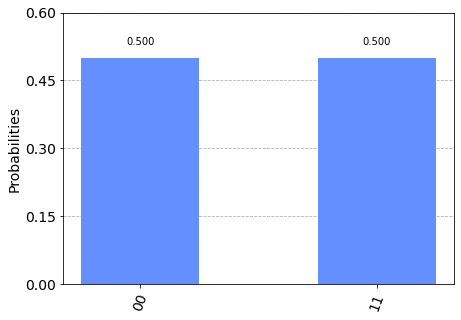

In [21]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)


In [31]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [29]:
backend  =  Aer.get_backend('statevector_simulator')
result  = execute(qc, backend).result().get_statevector()
print(result)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


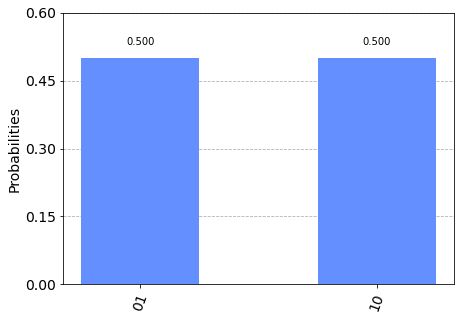

In [24]:
result = execute(qc, backend).result().get_counts()
plot_histogram(result)

In [32]:
backend  =  Aer.get_backend('unitary_simulator')
unitary = execute(qc, backend).result().get_unitary()
print(unitary)

[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]
